In [65]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# Задание

1. Разработать линейный конгруэнтный ГПСЧ.
2. Проверить равномерность распределения получаемой последовательности. Для этого построить гистограмму для получаемой последовательности и сравнить её с идеальной теоретической формой.
3. Найти длину периода генератора. Для этого определить элемент последовательности, заведомо лежащий внутри периода и подсчитать количество итераций до повторного появления в последовательности этого элемента.
4. Проверить качество младших разрядов последовательности. Для этого построить новую последовательность, элементы которой состоят из нескольких младших разрядов членов основной последовательности и выполнить для неё пункты 2 и 3 задания.

In [66]:
# 1. Разработать линейный конгруэнтный ГПСЧ.
class PseudoRandomGenerator:
  def __init__(self, module: int, multiplier: int, increment: int, seed: int):
    if not (0 <= seed < module):
      raise ValueError('seed (start value) must be in [0 and module)')
    if not (0 <= increment < module):
      raise ValueError('increment must be in [0 and module)')
    if not (0 <= multiplier < module):
      raise ValueError('multiplier must be in [0 and module)')
    
    self.module = module
    self.multiplier = multiplier
    self.increment = increment
    self.current = seed

  def next(self):
    self.current = (self.multiplier * self.current + self.increment) % self.module
    return self.current

In [67]:
AMOUNT = 240

MODULE = 175
MULTIPLIER = 2
START_VALUE = 13
INCREMENT = 1

dict_keys([27, 55, 111, 48, 97, 20, 41, 83, 167, 160, 146, 118, 62, 125, 76, 153, 132, 90, 6, 13])


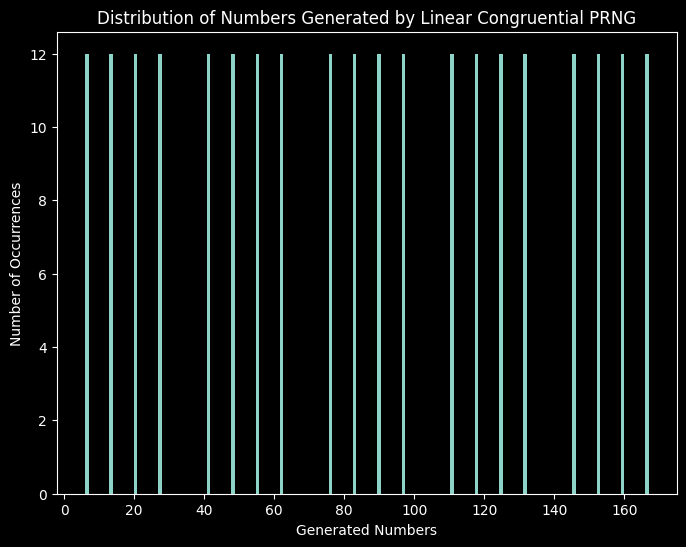

In [68]:
# 2. проверка равномерности

prg = PseudoRandomGenerator(MODULE, MULTIPLIER, INCREMENT, START_VALUE)
generated_numbers = [prg.next() for _ in range(AMOUNT)]
cntr = Counter(generated_numbers)

nums = cntr.keys()
occurences = np.array(cntr.values())
print(nums)
bins = max(nums) - min(nums) + 1 # кол-во столбцов и промежутков между

plt.figure(figsize=(8, 6)) 
plt.hist(generated_numbers, bins)
plt.xlabel('Generated Numbers')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Numbers Generated by Linear Congruential PRNG')
plt.show()

Плотность распределения этой случайной величины равна константе внутри интервала, **на котором она распределена** и равна 0 вне этого интервала.  

Мы нули не учитываем, величина там не распределена. Я это уточняю, чтобы точно ответить на вопрос. Распределение равномерно. Неравномерно, если у нас кол-во сгенерированных не делится нацело на длина периода. То есть просто где-то не хватило до равномерного распределения.

3.

Чтобы вычислить длину периода линейного конгруэнтного генератора (ЛКГ), необходимо использовать теоретические методы, так как нет прямой формулы для расчета периода на основе параметров генератора. Одним из подходов является использование алгоритмов обнаружения циклов, таких как алгоритм Флойда или алгоритм Брента, которые позволяют определить длину цикла в последовательности, генерируемой ЛКГ. Эти алгоритмы возвращают некоторый кратный длине периода, после чего можно факторизовать полученное число и найти наименьший из его делителей, который будет длиной периода. 

Сдеалал алгоритм флойда и просто глупую наивную реализацию простенького алгоритма, к-ый основывается на том, что распределение равномерно

In [69]:
def floyd_cycle_detection(generator_fabric, max_iterations=1000):
    """
    Функция для обнаружения длины периода генератора с помощью алгоритма Флойда.
    
    :param generator:       Функция генератора, возвращающая следующее число в последовательности.
    :param max_iterations:  Максимальное количество итераций для предотвращения бесконечного цикла.
    :return:                Длина периода генератора.
    """
    tortoise = generator_fabric()
    hare = generator_fabric()
    
    tortoise_value = tortoise.next()
    hare_value = hare.next()
    # Найти длину периода
    
    # тут мы просто ищем момент вхождения в цикл
    for i in range(max_iterations):
        tortoise_value = tortoise.next()
        hare.next()
        hare_value = hare.next()
        if (tortoise_value == hare_value):
            break
    
    period = 1
    hare = generator_fabric()
    
    hare_value = hare.next()
    while tortoise_value != hare_value:
        hare_value = hare.next()
        tortoise_value = tortoise.next()
        period += 1
    
    return period


def dummy_cycle_detection(generator):
    """
    Функция для обнаружения длины периода генератора.
    Ищем просто 2-ое вхождение первого элемента последовательности.
    Наивная реализация алгоритма только для равномерного распределения.
    
    :param generator:       Функция генератора, возвращающая следующее число в последовательности.
    :param max_iterations:  Максимальное количество итераций для предотвращения бесконечного цикла.
    :return:                Длина периода генератора.
    """

    grp = generator()
    target = grp.next()

    period = 1
    tmp = grp.next()
    while target != tmp:
        tmp = grp.next()
        period = period + 1
    
    return period


In [70]:
print(generated_numbers)
# Создаем фабрику генератора
prg_fabric = lambda: PseudoRandomGenerator(MODULE, MULTIPLIER, INCREMENT, START_VALUE)

# Вычисляем длину периода
period_length = floyd_cycle_detection(prg_fabric)
print(f"Длина периода: {period_length}")

period_length = dummy_cycle_detection(prg_fabric)
print(f"Длина периода: {period_length}")

[27, 55, 111, 48, 97, 20, 41, 83, 167, 160, 146, 118, 62, 125, 76, 153, 132, 90, 6, 13, 27, 55, 111, 48, 97, 20, 41, 83, 167, 160, 146, 118, 62, 125, 76, 153, 132, 90, 6, 13, 27, 55, 111, 48, 97, 20, 41, 83, 167, 160, 146, 118, 62, 125, 76, 153, 132, 90, 6, 13, 27, 55, 111, 48, 97, 20, 41, 83, 167, 160, 146, 118, 62, 125, 76, 153, 132, 90, 6, 13, 27, 55, 111, 48, 97, 20, 41, 83, 167, 160, 146, 118, 62, 125, 76, 153, 132, 90, 6, 13, 27, 55, 111, 48, 97, 20, 41, 83, 167, 160, 146, 118, 62, 125, 76, 153, 132, 90, 6, 13, 27, 55, 111, 48, 97, 20, 41, 83, 167, 160, 146, 118, 62, 125, 76, 153, 132, 90, 6, 13, 27, 55, 111, 48, 97, 20, 41, 83, 167, 160, 146, 118, 62, 125, 76, 153, 132, 90, 6, 13, 27, 55, 111, 48, 97, 20, 41, 83, 167, 160, 146, 118, 62, 125, 76, 153, 132, 90, 6, 13, 27, 55, 111, 48, 97, 20, 41, 83, 167, 160, 146, 118, 62, 125, 76, 153, 132, 90, 6, 13, 27, 55, 111, 48, 97, 20, 41, 83, 167, 160, 146, 118, 62, 125, 76, 153, 132, 90, 6, 13, 27, 55, 111, 48, 97, 20, 41, 83, 167, 160,

Проверить качество младших разрядов последовательности. Для этого построить новую последовательность, элементы которой состоят из нескольких младших разрядов членов основной последовательности и выполнить для неё пункты 2 и 3 задания.

In [71]:
AMOUNT_LOWER_DIGITS = 1

In [72]:

class PseudoRandomGeneratorLowerDigits(PseudoRandomGenerator):
    def __init__(self, module: int, multiplier: int, increment: int, seed: int, amount_lower_digits: int = 1):
        super().__init__(module, multiplier, increment, seed)
        self.amount_lower_digits = amount_lower_digits
    
    def next(self):
        self.current = (self.multiplier * self.current + self.increment) % self.module
        return self.current % 10**self.amount_lower_digits

[7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3]


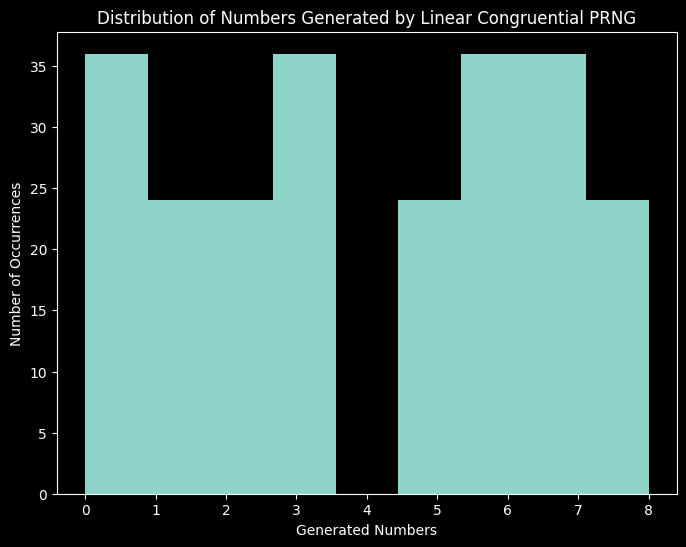

In [73]:
# 2. проверка равномерности
prgld = PseudoRandomGeneratorLowerDigits(MODULE, MULTIPLIER, INCREMENT, START_VALUE, AMOUNT_LOWER_DIGITS)
generated_numbers = [prgld.next() for _ in range(AMOUNT)]
cntr = Counter(generated_numbers)

print(generated_numbers)
nums = cntr.keys()
occurences = cntr.values()
bins = max(nums) - min(nums) + 1 # кол-во столбцов и промежутков между

plt.figure(figsize=(8, 6)) 
plt.hist(generated_numbers, bins)
plt.xlabel('Generated Numbers')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Numbers Generated by Linear Congruential PRNG')
plt.show()

распределение неравномерное, поэтому в отношении распределения младших разрядов в целом нельзя говорить о равномерном распределении. Но стоит отметить, что довольно-таки часто можно получить случай, где распределение происходит равномерное.

насчёт алгоритма ничего не придумывается, как отловить случай, например, (1,2,3)*n 4.  
Допустим, что период 1, 2, 3, 1, 2, 3, 4 - здесь n == 2. А если будет больше, то однозначно определить длину периода будет крайне тяжело. В голову приходят лишь алгоритмы в лоб.

In [74]:

prgld_fabric = lambda: PseudoRandomGeneratorLowerDigits(MODULE, MULTIPLIER, INCREMENT, START_VALUE)


def count_period_length_uneven_naive(generator_fabric, max_iterations=1000):
    """
    Функция для обнаружения длины периода генератора с неравномерным распределением.
    медленный и быстрый указатель
    при их равенстве:
    проверка на равенство кратных позиций и элементов вокруг
    
    :param generator:       Функция генератора, возвращающая следующее число в последовательности.
    :param max_iterations:  Максимальное количество итераций для предотвращения бесконечного поиска.
    :return:                Длина периода генератора.
    """
    generator = generator_fabric()
    generated_numbers = [generator.next() for _ in range(1000)]
    
    slow = -1
    fast = -1
    for i in range(max_iterations):
        slow += 1
        fast += 2
        if (generated_numbers[slow] == generated_numbers[fast]):
            diff = fast - slow
            
            if diff == 1:
                # здесь просто проверка 20 первых элементов на равенство.
                # если все равны, то считаем, что период равен 1
                res = all( elem == generated_numbers[slow] for elem in generated_numbers[:20])
                if not res:
                    continue
                return 1
            
            else:
                # тут можно найти много пограничных случаев, в которых алгоритм упадёт, но что-то
                # отдалённо похожее реализовано

                slow_slice = generated_numbers[slow:fast]
                fast_slice = generated_numbers[fast:fast+diff]
                additional_slice = generated_numbers[fast+diff:fast+2*diff]

                triplets = zip(slow_slice, fast_slice, additional_slice)

                res = all( triplet[0] == triplet[1] and triplet[1] == triplet[2] for triplet in triplets)
                if (not res):
                    continue
                return slow+1
            


period_length = count_period_length_uneven_naive(prgld_fabric)
print(f"Длина периода: {period_length}") # некорректно работает ...

Длина периода: 20


Ответ 20, как и у родительского случая. Это сложный кейс, но поскольку распределение неравномерное, можно подобрать такое распределение, период которого мой алгоритм может посчитать некоррректно. Банально, условность о первых 20 элементов, и равенство слайсов обойти также можно.

Хотелось написать что-то обобщённое, но не придумалось, всегда можно придумать неравномерное распределение, для к-го период будет посчитан неправильно


In [75]:
import math

class UniformNaiveGenerator:
    def __init__(self, distribution: int, start: float = -1, end: float = 1):
        self.distribution = distribution
        self.start = start
        self.end = end
        
        self.last = start
        self.step = (end - start) / distribution

    def next(self):
        next_last = self.last + self.step
        if (next_last > self.end):
            next_last = self.start
        self.last = next_last
        return self.last


class NormalGenerator:
    def __init__(self, div_1: int, div_2: int):
        self.ung_1 = UniformNaiveGenerator(div_1)
        self.ung_2 = UniformNaiveGenerator(div_2)

    def next(self):
        (x, y) = self.ung_1.next(), self.ung_2.next()
        s = x**2 + y**2
        
        while s > 1:    
            (x, y) = self.ung_1.next(), self.ung_2.next()
            s = x**2 + y**2
        
        z_1 = x * math.sqrt( -2 * math.log(s) / s)
        z_2 = y * math.sqrt( -2 * math.log(s) / s)
        return z_1, z_2





In [76]:
ng = NormalGenerator(1000, 100)

generated_numbers_z1 = []
generated_numbers_z2 = []

for _ in range(1000):
    generated_numbers_z1.append(ng.next()[0])
    generated_numbers_z2.append(ng.next()[1])

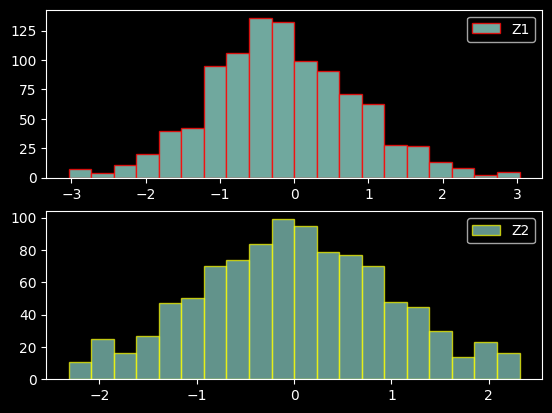

In [77]:
fig, axs = plt.subplots(2)

axs[0].hist(generated_numbers_z1, bins=20, label='Z1', alpha=0.8, edgecolor='red')
axs[0].legend()


axs[1].hist(generated_numbers_z2, bins=20, label='Z2', alpha=0.7, edgecolor='yellow')
axs[1].legend()

plt.show()


Построим QQ график для проверки нормальности распределения

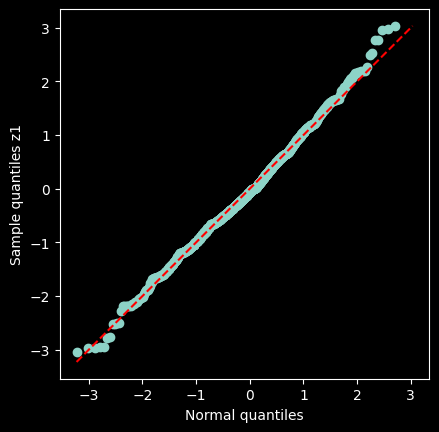

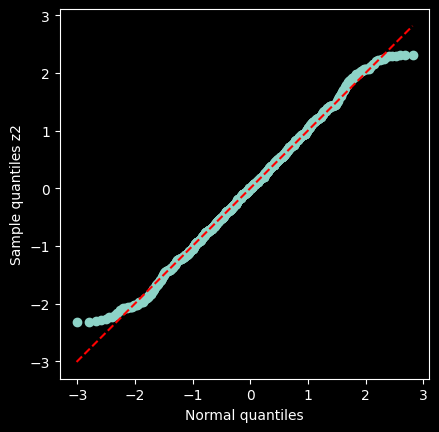

In [85]:
from scipy.stats import norm
def QQ_plot(data, label: str):

    # Sort as increasing
    y = np.sort(data)
    
    # Compute sample mean and std
    mean, std = np.mean(y), np.std(y)
    
    # Compute set of Normal quantiles
    ppf = norm(loc=mean, scale=std).ppf # Inverse CDF
    N = len(y)
    x = [ppf( i/(N+2) ) for i in range(1,N+1)]

    # Make the QQ scatter plot
    plt.scatter(x, y)
    
    # Plot diagonal line
    dmin, dmax = np.min([x,y]), np.max([x,y])
    diag = np.linspace(dmin, dmax, 1000)
    plt.plot(diag, diag, color='red', linestyle='--')
    plt.gca().set_aspect('equal')
    
    # Add labels
    plt.xlabel(f'Normal quantiles')
    plt.ylabel(f'Sample quantiles {label}' )
    plt.show()

QQ_plot(generated_numbers_z1, 'z1')
QQ_plot(generated_numbers_z2, 'z2')

по краям заметно отклонение от идеальной формы нормлаьного распределения. Но оно незначительно